In [1]:
# import modules
import pandas as pd
import numpy as np

In [2]:
# creating the dataframe
agric_df = pd.read_csv("MD_agric_exam-4313.csv")
agric_df.head()

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type
0,1162,494.95615,1507.6,-5.4,31.0,6.859436,0.007034,3.6,1.617421,coffee
1,5108,663.73390,581.0,-4.7,30.9,5.603219,0.289643,4.2,2.532497,potato
2,3504,396.87990,1715.1,-6.1,31.7,5.774116,0.000409,2.6,1.262207,banana
3,5351,594.80370,1748.0,-4.3,33.6,6.477415,0.088777,7.9,4.351564,wheat
4,905,609.49800,1395.8,-4.5,31.3,5.419586,0.050023,10.8,5.034791,cassava


In [3]:
# count unique crops
unique_crop_count = agric_df["Crop_type"].unique().size
unique_crop_count

8

In [4]:
# display the unique plants
print(agric_df["Crop_type"].unique())

['coffee' 'potato' 'banana' 'wheat' 'cassava' 'maize' 'tea' 'rice']


In [5]:
# max wheat annual yield(2dp)
max_wheat_yield = agric_df[(agric_df["Crop_type"] == "wheat")]["Annual_yield"].max()
print(round(max_wheat_yield, 2))

8.99


In [6]:
# Find the total rainfall for crop types where the average pollution level is above 0.2.
crop_pol_mean = agric_df.groupby(["Crop_type"])["Pollution_level"].mean()

# Calculate the average pollution level for each crop type
crop_pol_mean = agric_df.groupby(["Crop_type"])["Pollution_level"].mean()

# Filter crop types where the average pollution level is above 0.2
selected_crops = crop_pol_mean[crop_pol_mean > 0.2].index

# Sum the rainfall for the selected crop types
total_rainfall = agric_df[agric_df['Crop_type'].isin(selected_crops)]['Rainfall'].sum()

print(f'Total rainfall for crop types with average pollution level above 0.2: {total_rainfall} mm')



Total rainfall for crop types with average pollution level above 0.2: 941959.7 mm


In [7]:
# Assuming you have a DataFrame named agric_df
filtered_crops = agric_df.groupby("Crop_type").filter(lambda x: x["Pollution_level"].mean() > 0.2)
total_rainfall_for_filtered_crops = filtered_crops.groupby("Crop_type")["Rainfall"].sum()

print(total_rainfall_for_filtered_crops.sum())


941959.7000000001


In [8]:
# Write a function to calculate the temperature range (Max_temperature_C - Min_temperature_C) for each farmer's field.
# Then, call the function with the following `Field_ID`: `1458`, `1895`, and `5443`. What are the results of these 3 calls?

def func_(id, df):
    row = df[(df["Field_ID"] == id)]
    temperature_difference = row["Max_temperature_C"] - row["Min_temperature_C"]
    return temperature_difference

# Assuming 1458 is a valid index in your DataFrame agric_df
result = func_(1458, agric_df)
print(result)
result2 = func_(1895, agric_df)
print(result2)
result3 = func_(5443, agric_df)
print(result3)

135    40.7
dtype: float64
644    35.7
dtype: float64
892    33.4
dtype: float64


In [9]:
data = agric_df
a = data['Crop_type'].unique()

b = float('inf')

c = ''

for crop in a:

    d = data[data['Crop_type'] == crop]['Min_temperature_C'].mean()

    if d < b:

        b = d

        c = crop

print(c)



rice


In [10]:
# Write code to calculate the total plot size for plots where the pH is less than 5.5.

agric_df[agric_df["pH"]< 5.5]["Plot_size"].sum()

1731.8999999999999

In [11]:
# Using Pandas, create a dataframe that includes entries with a 'Min_temperature_C’< -5 
# and a 'Max_temperature_C' > 30. How many rows are in the filtered dataset?

agric_df[(agric_df['Min_temperature_C']< -5) & (agric_df['Max_temperature_C']>30)].shape[0]

319

In [12]:
# Using Numpy, calculate the standard deviation of the 'Rainfall' 
# for plots where the 'Plot_size' is larger than the median plot size of the dataset (round to 2 decimal places)
mdn_plot = agric_df["Plot_size"].median()
big_plot = agric_df[agric_df["Plot_size"] > mdn_plot]
std_rain_big = np.std(big_plot["Rainfall"], ddof = 0)
std_rain_big


469.6199685856172

In [13]:
# If you concatenate the first three digits of the most common ‘Max_temperature_C’ with the last three letters of the least
# common 'Crop_type', what string do you get?
# Note: Use the first mode if there are multiple modes
most_com_max = agric_df["Max_temperature_C"].value_counts().idxmax()
least_com_crop = agric_df["Crop_type"].value_counts().idxmin()
print("most_com_max :",most_com_max)
print("least com crop :", least_com_crop)

most_com_max : 30.7
least com crop : rice


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_10601/402820724.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Elevation_Category', y='Annual_yield', data=agric_df, palette='viridis')


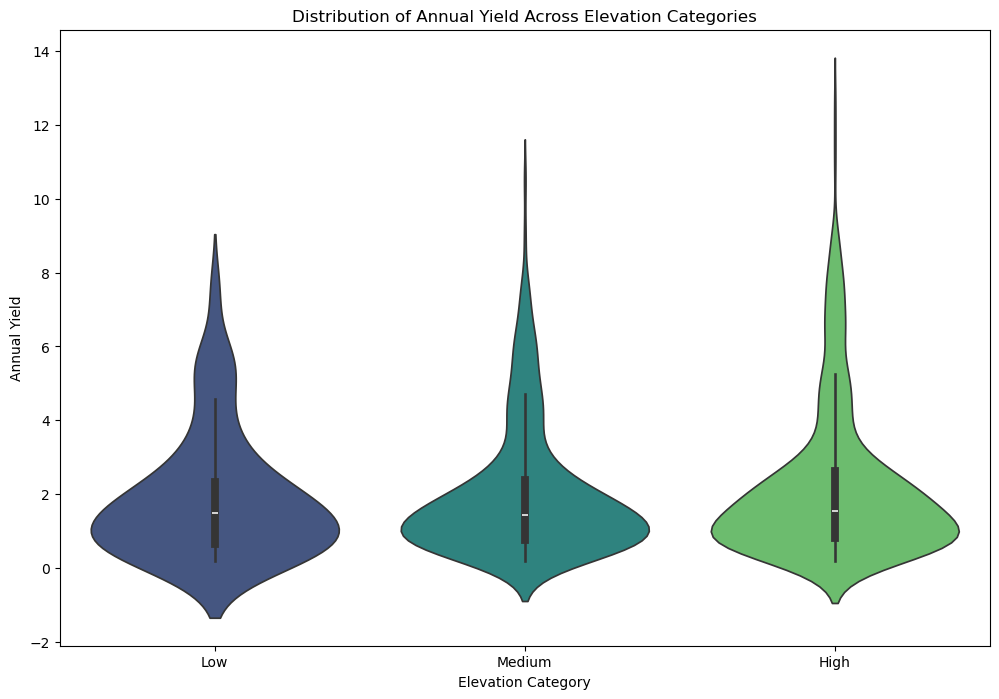

In [14]:
# Write Python code to create a violin plot visualising the distribution of 'Annual_yield' across different 'Elevation' ranges.
# Use the provided elevation range categories (Low: < 300m, Medium: 300m - 600m, High: > 600m) to categorise the data before plotting. 
# Examine the violin plot displaying the distribution of 'Annual Yield' across three elevation categories (Low, Medium, High). 

import seaborn as sns
import matplotlib.pyplot as plt

# create 'Elevation_Category' based on the provided elevation ranges
agric_df['Elevation_Category'] = pd.cut(agric_df['Elevation'], bins=[-float('inf'), 300, 600, float('inf')], labels=['Low', 'Medium', 'High'])

# Create the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Elevation_Category', y='Annual_yield', data=agric_df, palette='viridis')

# Set labels and title
plt.xlabel('Elevation Category')
plt.ylabel('Annual Yield')
plt.title('Distribution of Annual Yield Across Elevation Categories')

# Show the plot
plt.show()


In [21]:
# Assuming each 'Crop_type' contributes an integer value equal to its length (e.g., 'wheat' contributes 5),
# write a recursive function to sum the integer values for each unique crop type in the dataset. What is the sum?

def rec_sum_crop(df, n=0, total_sum=0):
    unique_crops = df["Crop_type"].unique()

    if n < len(unique_crops):
        total_sum += len(unique_crops[n])
        n += 1
        return rec_sum_crop(df, n, total_sum)
    else:
        return total_sum

# Assuming 'agric_df' is your DataFrame
total_crop_length_sum = rec_sum_crop(agric_df)

print("The sum of lengths of characters for each unique crop type:", total_crop_length_sum)



The sum of lengths of characters for each unique crop type: 42


In [22]:
print(unique_crops)

['coffee' 'potato' 'banana' 'wheat' 'cassava' 'maize' 'tea' 'rice']


In [23]:
# Write Python code to perform a t-test comparing the average 'Annual_yield' between 'coffee' and 'banana' crop types 
# using scipy.stats. What is the p-value, rounded to three decimal places?
from scipy.stats import ttest_ind

coffee_yield = agric_df[agric_df["Crop_type"] == "coffee"]["Annual_yield"]
banana_yield = agric_df[agric_df["Crop_type"] == "banana"]["Annual_yield"]

# Perform t-test
t_stat, p_value = ttest_ind(coffee_yield, banana_yield, equal_var=False)

# Print the p-value rounded to three decimal places
print(f"The p-value for the t-test is: {round(p_value, 3)}")


The p-value for the t-test is: 0.598
